# Esophageal Carcinoma (ESCA)
[Jump to the urls to download the GCT and CLS files](#Downloads)

**Authors:** Alejandra Ramos, Marylu Villa and Edwin Juarez 
**Is this what you want your scientific identity to be?**  
**Contact info:** Email Edwin at [ejuarez@cloud.ucsd.edu](mailto:ejuarez@cloud.ucsd.edu) or post a question in http://www.genepattern.org/help

This notebook provides the steps to download all the ESCA samples from The Cancer Genome Atlas (TCGA) contained in the Genomic Data Commons (GDC) Data portal. These samples can be downloaded as a GCT file and phenotype labels (primary tumor vs normal samples) can be downloaded as a CLS file. These files are compatible with other GenePattern Analyses.

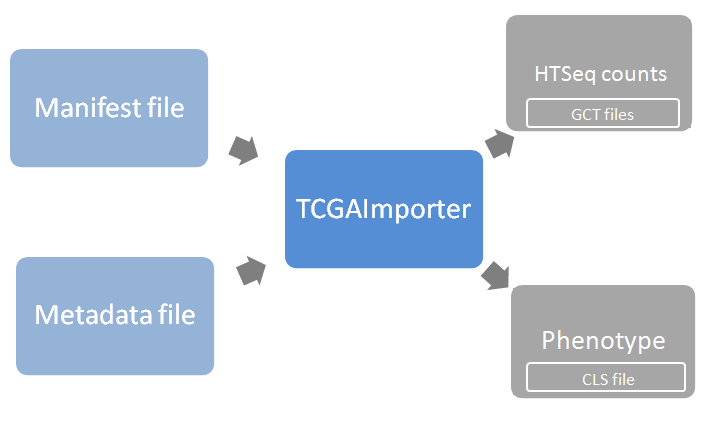

# Overview


ESCA is cancer arising from the esophagus the food pipe that runs between the throat and the stomach.
Symptoms often include difficulty in swallowing and weight loss.
Esophageal cancer usually begins in the cells that line the inside of the esophagus. Esophageal cancer can occur anywhere along the esophagus.

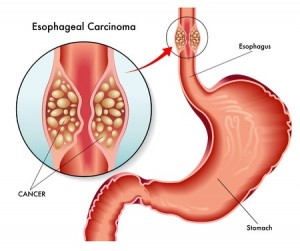

# ESCA Statistics

This year, an estimated 17,290 adults (13,480 men and 3,810 women) in the United States will be diagnosed with esophageal cancer. The disease accounts for 1% of cancers diagnosed in the United States. It is diagnosed more often in other parts of the world.

It is estimated that 15,850 deaths (12,850 men and 3,000 women) from this disease will occur this year. Esophageal cancer is the seventh most common cause of cancer death among men.

The 5-year survival rate tells you what percent of people live at least 5 years after the cancer is found. Percent means how many out of 100. The 5-year survival rate for people with esophageal cancer is 19%. 

However, survival rates depend on several factors, including the stage of the cancer when it is first diagnosed. The 5-year survival rate of people with cancer located only in the esophagus is 43%. The 5-year survival rate for those with disease that has spread to surrounding tissues or organs and/or the regional lymph nodes is 23%. If it has spread to distant parts of the body, the survival rate is 5%.



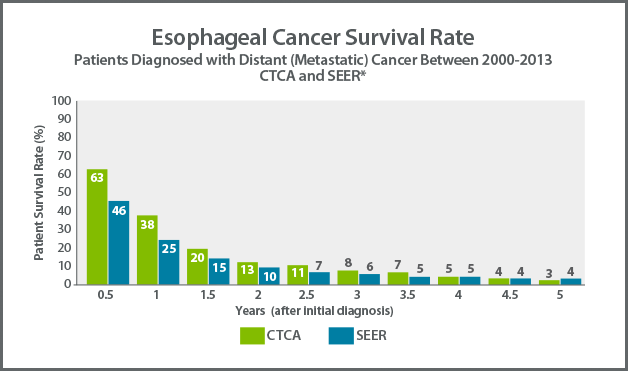
https://humananatomylibrary.co/photos/5466/esophageal-cancer-survival-statistics-ctca-esophageal-cancer-survival-rate-2016.asp

# Dataset's Demographic information

<p>TCGA contained 172 ESCA&nbsp;samples&nbsp;(161 primary cancer samples, and 11 normal tissue samples)&nbsp; from 164&nbsp;people. Below is a summary of the demographic information represented in this dataset. If you are interested in viewing the complete study, as well as the files on the GDC Data Portal, you can follow&nbsp;<a href="https://portal.gdc.cancer.gov/repository?facetTab=cases&amp;filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-UVM%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.experimental_strategy%22%2C%22value%22%3A%5B%22RNA-Seq%22%5D%7D%7D%5D%7D&amp;searchTableTab=cases" target="_blank">this link.(these data were gathered on July 17th, 2018)</a></p>


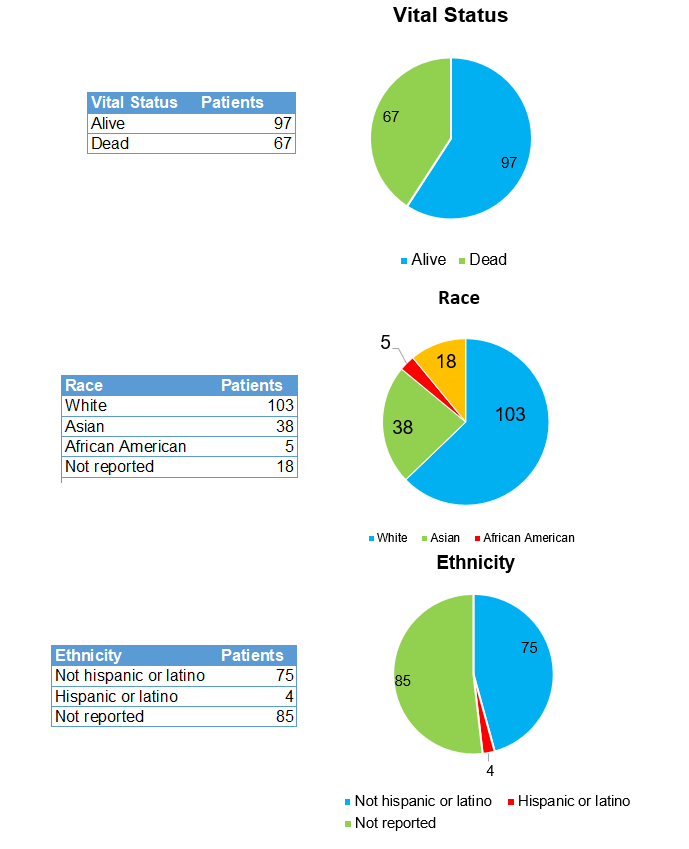

# Login to GenePattern


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Login to the *GenePattern Cloud* server.</li>
</ol>

</div>

In [21]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

# Downloading RNA-Seq HTSeq Counts Using TCGAImporter

Use the TCGAImporter module to download RNA-Seq HTSeq counts from the GDC Data Portal using a Manifest file and a Metadata file

<p><strong>Input files</strong></p>

<ul>
	<li><em>Manifest file</em>: a file containing the list of RNA-Seq samples to be downloaded.</li>
	<li><em>Metadata file</em>: a file containing information about the files present at the GDC Data Portal. Instructions for downloading the Manifest and Metadata files can be found here: <a href="https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf" target="_blank">https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf</a></li>
</ul>

<p><strong>Output files</strong></p>

<ul>
	<li><em>ESCA_TCGA.gct</em> - This is a tab delimited file that contains the gene expression&nbsp;(HTSeq&nbsp;counts) from the samples listed on the Manifest file. For more info on GCT files, look at reference <a href="#References">1</a><em> </em></li>
	<li><em><em>ESCA_TCGA.cls</em> -</em> The CLS file defines phenotype labels (in this case Primary Tumor and Normal Sample) and associates each sample in the GCT file with a label. For more info on CLS files, look at reference <a href="#References">2</a></li>
</ul>


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Load the manifest file in **Manifest** parameter.</li>
    <li>Load the metadata file in **Metadata** parameter.</li>
    <li>Click **run**.</li>
</ol>

</div>

<p><strong>Estimated run time for TCGAImporter</strong> : ~ 7 minutes</p>


In [22]:
tcgaimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')
tcgaimporter_job_spec = tcgaimporter_task.make_job_spec()
tcgaimporter_job_spec.set_parameter("manifest", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run69801002746158483.tmp/ESCA_MANIFEST.txt")
tcgaimporter_job_spec.set_parameter("metadata", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run2850916543318115311.tmp/ESCA_METADATA.json")
tcgaimporter_job_spec.set_parameter("output_file_name", "ESCA_TCGA")
tcgaimporter_job_spec.set_parameter("gct", "True")
tcgaimporter_job_spec.set_parameter("translate_gene_id", "False")
tcgaimporter_job_spec.set_parameter("cls", "True")
genepattern.display(tcgaimporter_task)

job35217 = gp.GPJob(genepattern.session.get(0), 35217)
genepattern.display(job35217)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')

GPJobWidget(job_number=31594)

In [23]:
collapsedataset_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')
collapsedataset_job_spec = collapsedataset_task.make_job_spec()
collapsedataset_job_spec.set_parameter("dataset.file", "https://cloud.genepattern.org/gp/jobResults/31594/TCGA_dataset.gct")
collapsedataset_job_spec.set_parameter("chip.platform", "ftp://ftp.broadinstitute.org/pub/gsea/annotations/ENSEMBL_human_gene.chip")
collapsedataset_job_spec.set_parameter("collapse.mode", "Maximum")
collapsedataset_job_spec.set_parameter("output.file.name", "<dataset.file_basename>.collapsed")
genepattern.display(collapsedataset_task)


job32395 = gp.GPJob(genepattern.session.get(0), 32395)
genepattern.display(job32395)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')

GPJobWidget(job_number=32395)

# Downloads


<p>You can download the input and output files of TCGAImporter for this cancer type here:</p>

<p><strong>Inputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_MANIFEST.txt" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/ESCA/ESCA_MANIFEST.txt</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_METADATA.json" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/ESCA/ESCA_METADATA.json</a></li>
</ul>

<p><strong>Outputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.gct" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/ESCA/ESCA_TCGA.gct</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.cls" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/ESCA/ESCA_TCGA.cls</a></li>
</ul>


If you'd like to download similar files for other TCGA datasets, visit this link: 
- https://datasets.genepattern.org/?prefix=data/TCGA_HTSeq_counts/

# References

[1] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT

[2] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#CLS

[3] <a href="https://en.wikipedia.org/wiki/Esophageal_cancer" target="_blank">https://en.wikipedia.org/wiki/Esophageal_cancer</a> <a href="https://www.mayoclinic.org/diseases-conditions/esophageal-cancer/symptoms-causes/syc-20356084" target="_blank">https://www.mayoclinic.org/diseases-conditions/esophageal-cancer/symptoms-causes/syc-20356084</a> <a href="https://www.cancer.net/cancer-types/esophageal-cancer/statistics" target="_blank">https://www.cancer.net/cancer-types/esophageal-cancer/statistics</a></p>

[4] https://en.wikipedia.org/wiki/Esophageal_cancer</p>
